<a href="https://colab.research.google.com/github/haneulee/creative-coding-HEAD/blob/main/Copie_de_OpenCellID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Open cell id analysis


Pandas is a powerful and flexible Python library used for data manipulation and analysis. This handbook is designed to help you understand and master the fundamental concepts and operations of Pandas, making your data analysis tasks more efficient and insightful. And hopefully more fun.

## What Will You Learn?

- **Basics of Pandas**: Understand the core structures of Pandas.
- **Data Cleaning**: Techniques to handle missing data, remove duplicates, and fix data inconsistencies.
- **Data visualisation** *italicised text*: Plot your data to a map

I use pandas very often for quick and efficient analysis, not per se for visualisation since you can quickly reach its limits in terms of aesthetics. Nonetheless, it's great (plus really fast) for [data-crunching](https://www.netsuite.com/portal/resource/articles/erp/data-crunching.shtml). Once you did your analysis, you can export a clean CSV file which you can use later on.


Download file from https://opencellid.org/downloads.php


In [6]:
!wget -O 228.csv.zip https://drive.switch.ch/index.php/s/od5HKbs9OguK1iG/download

--2024-09-28 08:07:05--  https://drive.switch.ch/index.php/s/od5HKbs9OguK1iG/download
Resolving drive.switch.ch (drive.switch.ch)... 86.119.34.138, 86.119.34.137, 2001:620:5ca1:1ee::11, ...
Connecting to drive.switch.ch (drive.switch.ch)|86.119.34.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 851842 (832K) [application/zip]
Saving to: ‘228.csv.zip’

228.csv.zip         100%[===================>] 831.88K  1.01MB/s    in 0.8s    

2024-09-28 08:07:07 (1.01 MB/s) - ‘228.csv.zip’ saved [851842/851842]



In [7]:
!unzip 228.csv.zip

Archive:  228.csv.zip
  inflating: 228.csv                 
  inflating: __MACOSX/._228.csv      


In [28]:
# prompt: get df from WigleWifi_20240921203945.csv

import pandas as pd

df = pd.read_csv('WigleWifi_20240919173934.csv')
df


,MAC,SSID,AuthMode,FirstSeen,Channel,Frequency,RSSI,CurrentLatitude,CurrentLongitude,AltitudeMeters,AccuracyMeters,RCOIs,MfgrId,Type
0,76:fa:fb:46:c5:98,NaN,Uncategorized;10,2024-09-18 16:06:42,NaN,7936.0,-94,46.208587,6.140230,407.498535,10.122987,NaN,NaN,BT
1,5e:85:0c:92:53:cb,NaN,Uncategorized;10,2024-09-18 16:06:42,NaN,7936.0,-92,46.208587,6.140230,407.498535,10.122987,NaN,NaN,BT
2,75:1d:a4:bf:c0:0e,NaN,Uncategorized;10,2024-09-18 16:06:42,NaN,7936.0,-65,46.208587,6.140230,407.498535,10.122987,NaN,NaN,BT
3,78:f0:17:d9:10:ee,NaN,Uncategorized;10,2024-09-18 16:06:42,NaN,7936.0,-85,46.208587,6.140230,407.498535,10.122987,NaN,NaN,BT
4,48:68:53:8e:1c:fc,NaN,Uncategorized;10,2024-09-18 16:06:42,NaN,7936.0,-93,46.208587,6.140230,407.498535,10.122987,NaN,NaN,BT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,ea:4f:25:b2:f1:6c,My VW 3561,[WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS][WPS],2024-09-19 15:39:23,6.0,2437.0,-87,46.204892,6.155755,426.782349,3.887694,NaN,NaN,WIFI
413,60:22:32:88:28:26,Cavaliero & Associates,[WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS],2024-09-19 15:39:23,1.0,2412.0,-80,46.204892,6.155755,426.782349,3.887694,NaN,NaN,WIFI
414,5a:e4:03:8b:2e:ee,Audi_MMI_2293,[WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS],2024-09-19 15:39:23,6.0,2437.0,-81,46.204892,6.155755,426.782349,3.887694,NaN,NaN,WIFI
415,62:22:32:98:28:26,Guest - Cavaliero & Associates,[WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS],2024-09-19 15:39:23,1.0,2412.0,-86,46.204892,6.155755,426.782349,3.887694,NaN,NaN,WIFI


In [31]:
# prompt: remove 'RC0Is', 'MfgrId', 'RSSI', 'AccuracyMeters' column in the table

df = df.drop(['RCOIs', 'MfgrId', 'RSSI', 'AccuracyMeters'], axis=1)
df


,MAC,SSID,AuthMode,FirstSeen,Channel,Frequency,CurrentLatitude,CurrentLongitude,AltitudeMeters,Type
0,76:fa:fb:46:c5:98,NaN,Uncategorized;10,2024-09-18 16:06:42,NaN,7936.0,46.208587,6.140230,407.498535,BT
1,5e:85:0c:92:53:cb,NaN,Uncategorized;10,2024-09-18 16:06:42,NaN,7936.0,46.208587,6.140230,407.498535,BT
2,75:1d:a4:bf:c0:0e,NaN,Uncategorized;10,2024-09-18 16:06:42,NaN,7936.0,46.208587,6.140230,407.498535,BT
3,78:f0:17:d9:10:ee,NaN,Uncategorized;10,2024-09-18 16:06:42,NaN,7936.0,46.208587,6.140230,407.498535,BT
4,48:68:53:8e:1c:fc,NaN,Uncategorized;10,2024-09-18 16:06:42,NaN,7936.0,46.208587,6.140230,407.498535,BT
...,...,...,...,...,...,...,...,...,...,...
412,ea:4f:25:b2:f1:6c,My VW 3561,[WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS][WPS],2024-09-19 15:39:23,6.0,2437.0,46.204892,6.155755,426.782349,WIFI
413,60:22:32:88:28:26,Cavaliero & Associates,[WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS],2024-09-19 15:39:23,1.0,2412.0,46.204892,6.155755,426.782349,WIFI
414,5a:e4:03:8b:2e:ee,Audi_MMI_2293,[WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS],2024-09-19 15:39:23,6.0,2437.0,46.204892,6.155755,426.782349,WIFI
415,62:22:32:98:28:26,Guest - Cavaliero & Associates,[WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS],2024-09-19 15:39:23,1.0,2412.0,46.204892,6.155755,426.782349,WIFI


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [33]:
# prompt: save a new column with the response from this url ('https://api.macvendors.com/' + df['MAC'].str.replace(':', '-'))

import requests

def get_vendor(mac_address):
  try:
    response = requests.get(f'https://api.macvendors.com/{mac_address}')
    if response.status_code == 200:
      return response.text
    else:
      return None
  except:
    return None


df['Vendor'] = df['MAC'].str.replace(':', '-').apply(get_vendor)


In [34]:
# prompt: generate new column with this string "https://api.macvendors.com/ " and value from column mac address but replace : with - and put


# df['mac_vendor_url'] = 'https://api.macvendors.com/' + df['MAC'].str.replace(':', '-')
# print(df['mac_vendor_url'])
df


,MAC,SSID,AuthMode,FirstSeen,Channel,Frequency,CurrentLatitude,CurrentLongitude,AltitudeMeters,Type,Vendor
0,76:fa:fb:46:c5:98,NaN,Uncategorized;10,2024-09-18 16:06:42,NaN,7936.0,46.208587,6.140230,407.498535,BT,None
1,5e:85:0c:92:53:cb,NaN,Uncategorized;10,2024-09-18 16:06:42,NaN,7936.0,46.208587,6.140230,407.498535,BT,None
2,75:1d:a4:bf:c0:0e,NaN,Uncategorized;10,2024-09-18 16:06:42,NaN,7936.0,46.208587,6.140230,407.498535,BT,None
3,78:f0:17:d9:10:ee,NaN,Uncategorized;10,2024-09-18 16:06:42,NaN,7936.0,46.208587,6.140230,407.498535,BT,None
4,48:68:53:8e:1c:fc,NaN,Uncategorized;10,2024-09-18 16:06:42,NaN,7936.0,46.208587,6.140230,407.498535,BT,None
...,...,...,...,...,...,...,...,...,...,...,...
412,ea:4f:25:b2:f1:6c,My VW 3561,[WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS][WPS],2024-09-19 15:39:23,6.0,2437.0,46.204892,6.155755,426.782349,WIFI,None
413,60:22:32:88:28:26,Cavaliero & Associates,[WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS],2024-09-19 15:39:23,1.0,2412.0,46.204892,6.155755,426.782349,WIFI,None
414,5a:e4:03:8b:2e:ee,Audi_MMI_2293,[WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS],2024-09-19 15:39:23,6.0,2437.0,46.204892,6.155755,426.782349,WIFI,None
415,62:22:32:98:28:26,Guest - Cavaliero & Associates,[WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS],2024-09-19 15:39:23,1.0,2412.0,46.204892,6.155755,426.782349,WIFI,None


from matplotlib import pyplot as plt
df['Channel'].plot(kind='hist', bins=20, title='Channel')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Frequency'].plot(kind='hist', bins=20, title='Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['CurrentLatitude'].plot(kind='hist', bins=20, title='CurrentLatitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['CurrentLongitude'].plot(kind='hist', bins=20, title='CurrentLongitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Channel', y='Frequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Frequency', y='CurrentLatitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='CurrentLatitude', y='CurrentLongitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='CurrentLongitude', y='AltitudeMeters', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Channel'].plot(kind='line', figsize=(8, 4), title='Channel')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Frequency'].plot(kind='line', figsize=(8, 4), title='Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['CurrentLatitude'].plot(kind='line', figsize=(8, 4), title='CurrentLatitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['CurrentLongitude'].plot(kind='line', figsize=(8, 4), title='CurrentLongitude')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Channel', y='Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Frequency', y='Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='CurrentLatitude', y='Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='CurrentLongitude', y='Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [43]:
# prompt: save this result as csv file

df.to_csv('cell_id_analysis_result.csv', index=False)


In [42]:
# prompt: filter if Vendor !== none and save this table

df_filtered = df[df['Vendor'].notna()]
df_filtered.to_csv('filtered_vendors.csv', index=False)
df_filtered


,MAC,SSID,AuthMode,FirstSeen,Channel,Frequency,CurrentLatitude,CurrentLongitude,AltitudeMeters,Type,Vendor
12,10:5a:f7:5a:a8:9f,La Trattoria Geneve,[WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS],2024-09-18 16:06:47,36.0,5180.0,46.208581,6.140225,407.036377,WIFI,ADB Italia
16,70:e4:22:a4:91:b0,vdg-guest,[WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS],2024-09-19 13:59:23,1.0,2412.0,46.220364,6.153304,431.337280,WIFI,"Cisco Systems, Inc"
24,94:f6:65:0d:fe:58,byh-77707,[WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS],2024-09-19 13:59:33,5.0,2432.0,46.220383,6.153309,425.136902,WIFI,Ruckus Wireless
28,74:ac:b9:6d:16:c4,NaN,[WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS],2024-09-19 13:59:42,1.0,2412.0,46.220374,6.153321,423.946411,WIFI,Ubiquiti Inc
32,00:05:fe:c7:43:71,unknown TRC476017,[WPA2-PSK-CCMP][RSN-PSK-CCMP][ESS],2024-09-19 13:59:47,7.0,2442.0,46.220377,6.153322,423.479004,WIFI,Traficon N.V.
48,70:e4:22:a4:a3:80,((o)) ville-geneve,[ESS],2024-09-19 14:01:43,1.0,2412.0,46.220391,6.153353,431.615479,WIFI,"Cisco Systems, Inc"
62,70:47:77:a9:bb:50,FourSeasons,[ESS],1970-01-01 00:00:00,149.0,5745.0,46.251275,6.159414,0.000000,WIFI,Ruckus Wireless
66,cc:d0:83:01:a2:21,Nico&Co guest,[ESS],1970-01-01 00:00:00,1.0,2412.0,46.251275,6.159414,0.000000,WIFI,Hewlett Packard Enterprise
70,5c:5a:c7:de:06:e1,PWS_GWLAN,[ESS],1970-01-01 00:00:00,5.0,2432.0,46.251275,6.159414,0.000000,WIFI,"Cisco Systems, Inc"
80,70:47:77:69:bb:50,FourSeasons,[ESS],1970-01-01 00:00:00,11.0,2462.0,46.251275,6.159414,0.000000,WIFI,Ruckus Wireless


In [ ]:
# prompt: filter df for highest frequency

# Assuming 'frequency' is a column in your DataFrame
df_highest_frequency = df[df['Frequency'] == df['Frequency'].max()]
df_highest_frequency

,MAC,SSID,AuthMode,FirstSeen,Channel,Frequency,RSSI,CurrentLatitude,CurrentLongitude,AltitudeMeters,AccuracyMeters,RCOIs,MfgrId,Type
18,6c:67:04:a2:b5:4d,NaN,Uncategorized;10,2024-09-21 18:39:14,NaN,7936.0,-97,46.205571,6.149235,429.908325,3.790092,NaN,NaN,BT
19,69:04:19:26:a6:3a,NaN,Uncategorized;10,2024-09-21 18:39:14,NaN,7936.0,-95,46.205571,6.149235,429.908325,3.790092,NaN,NaN,BT
20,40:08:43:34:94:25,NaN,Uncategorized;10,2024-09-21 18:39:14,NaN,7936.0,-56,46.205571,6.149235,429.908325,3.790092,NaN,NaN,BLE
21,66:64:2f:77:d4:a2,NaN,Uncategorized;10,2024-09-21 18:39:15,NaN,7936.0,-82,46.205572,6.149234,430.129395,3.790092,NaN,NaN,BT
22,74:69:70:55:a0:a6,NaN,Uncategorized;10,2024-09-21 18:39:15,NaN,7936.0,-72,46.205572,6.149234,430.129395,3.790092,NaN,NaN,BT
23,04:ee:03:49:57:9a,NaN,Uncategorized;10,2024-09-21 18:39:15,NaN,7936.0,-84,46.205572,6.149234,430.129395,3.790092,NaN,NaN,BT
24,5c:60:ba:99:a5:a9,NaN,Uncategorized;10,2024-09-21 18:39:16,NaN,7936.0,-97,46.205572,6.149235,430.001709,3.790092,NaN,NaN,BT
25,6a:4d:85:90:7c:5d,NaN,Uncategorized;10,2024-09-21 18:39:16,NaN,7936.0,-88,46.205572,6.149235,430.001709,3.790092,NaN,NaN,BT
26,c0:48:e6:23:b7:dc,[TV] Room524,Uncategorized;10,2024-09-21 18:39:16,NaN,7936.0,-96,46.205572,6.149235,430.001709,3.790092,NaN,NaN,BT
28,7c:64:56:84:b2:b7,[TV] Samsung 7 Series (75),Uncategorized;10,2024-09-21 18:39:17,NaN,7936.0,-94,46.205572,6.149236,430.239746,3.790092,NaN,NaN,BT


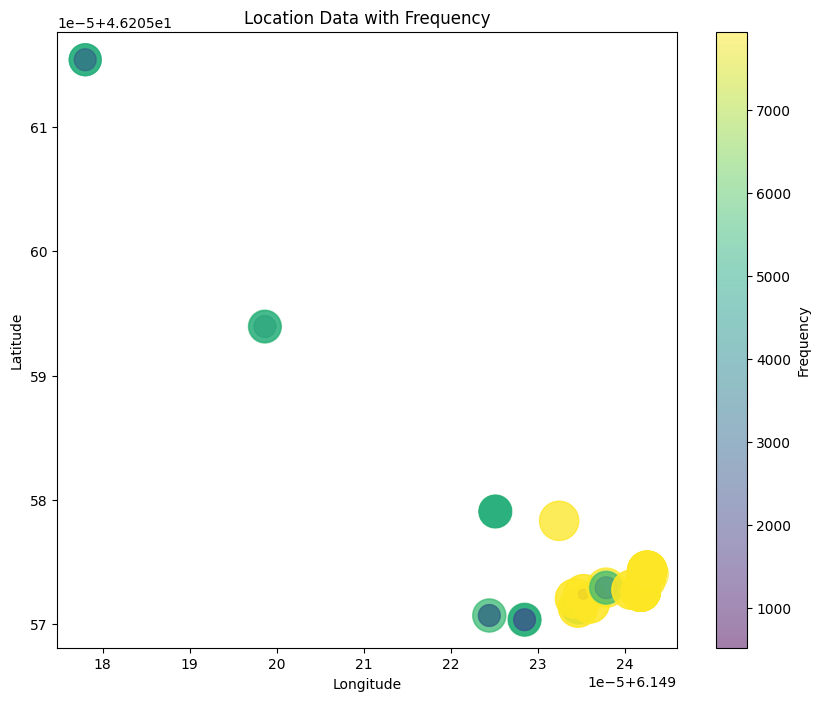

In [ ]:
# prompt: visualize CurrentLongitude, CurrentLatitude and CurrentAltitude and paint each point differently with different size depending on frequency values

import matplotlib.pyplot as plt
import numpy as np

# Assuming 'Frequency' is the column name for frequency values
# If not, replace it with the actual column name in your DataFrame

# Create a scatter plot with different colors and sizes based on frequency
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
plt.scatter(df['CurrentLongitude'], df['CurrentLatitude'], c=df['Frequency'], s=df['Frequency'] * 0.1, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Location Data with Frequency')
plt.colorbar(label='Frequency')

plt.show()


## Import pandas and read CSV file

In [ ]:
import pandas as pd

# read csv file
df = pd.read_csv("228.csv")
ef = pd.read_csv("228.csv")
df

,radio,mcc,mnc,lac,cid,psc,lon,lat,range,samples,changeable,created,updated,averagesignal
0,GSM,228,3,9008,28770,0,9.2233,46.4199,5020,192,1,1311685374,1692411826,0
1,GSM,228,3,9005,20265,0,8.3093,46.9756,4989,17,1,1316704503,1713378502,0
2,GSM,228,3,9008,28950,0,8.7110,46.5148,31702,53,1,1319115833,1688703716,0
3,GSM,228,3,9008,28771,0,9.2302,46.4021,4308,177,1,1330183266,1692412072,0
4,GSM,228,1,20747,55649,0,6.7412,46.4427,16009,3,1,1358870632,1695474376,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41290,LTE,228,1,2603,19161861,-1,7.2559,47.1434,1000,4,1,1726928394,1726949347,0
41291,LTE,228,1,2603,18609158,-1,7.2563,47.1435,1000,1,1,1726928474,1726928474,0
41292,LTE,228,1,2603,16897794,-1,7.2565,47.1433,1000,1,1,1726928484,1726928484,0
41293,LTE,228,1,2603,19161858,-1,7.2565,47.1432,1000,1,1,1726928504,1726928504,0


## Data cleaning

Check if values are missing:

In [ ]:
# Check for missing values
df.isnull().sum()

,0
radio,0
mcc,0
mnc,0
lac,0
cid,0
psc,0
lon,0
lat,0
range,0
samples,0


Check for duplicates

In [ ]:
# Check for duplicate rows
df.duplicated().sum()

0

If you have duplicates you could again delete them via:

In [ ]:
# Drop duplicate rows (if any)
df.drop_duplicates(inplace=True)

## Filters

Find out the bounding box for a region and get its coordinates. Tools like http://bboxfinder.com/ can help! Next, we define a geographic area with 2 GPS points (2x lat, 2x lon)

In [ ]:
df

,radio,mcc,mnc,lac,cid,psc,lon,lat,range,samples,changeable,created,updated,averagesignal
0,GSM,228,3,9008,28770,0,9.2233,46.4199,5020,192,1,1311685374,1692411826,0
1,GSM,228,3,9005,20265,0,8.3093,46.9756,4989,17,1,1316704503,1713378502,0
2,GSM,228,3,9008,28950,0,8.7110,46.5148,31702,53,1,1319115833,1688703716,0
3,GSM,228,3,9008,28771,0,9.2302,46.4021,4308,177,1,1330183266,1692412072,0
4,GSM,228,1,20747,55649,0,6.7412,46.4427,16009,3,1,1358870632,1695474376,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41290,LTE,228,1,2603,19161861,-1,7.2559,47.1434,1000,4,1,1726928394,1726949347,0
41291,LTE,228,1,2603,18609158,-1,7.2563,47.1435,1000,1,1,1726928474,1726928474,0
41292,LTE,228,1,2603,16897794,-1,7.2565,47.1433,1000,1,1,1726928484,1726928484,0
41293,LTE,228,1,2603,19161858,-1,7.2565,47.1432,1000,1,1,1726928504,1726928504,0


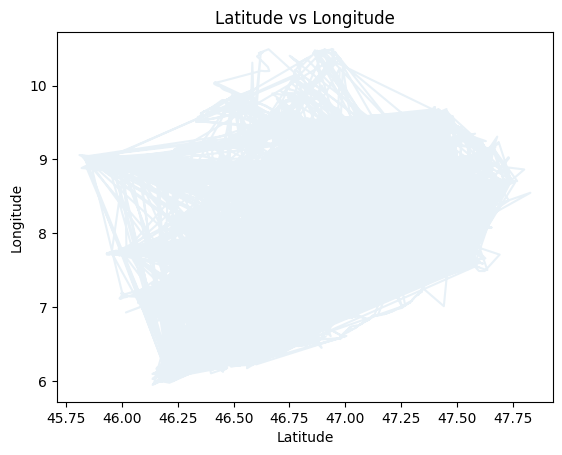

In [ ]:
# prompt: visualize latitude, longitude as a linear graphic, make lines opacity 0.5

import matplotlib.pyplot as plt

# Assuming df has 'lat' and 'lon' columns
plt.plot(df['lat'], df['lon'], alpha=0.1)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Latitude vs Longitude')
plt.show()


In [ ]:
# Define Geneva bounding box
min_lat = 46.1345
max_lat = 46.2836
min_lon = 6.0140
max_lon = 6.2410

In [ ]:
# filter for results that fit into this area
df_geneva = df[
    (df['lat'] >= min_lat) & (df['lat'] <= max_lat) &
    (df['lon'] >= min_lon) & (df['lon'] <= max_lon)
]
df_geneva

,radio,mcc,mnc,lac,cid,psc,lon,lat,range,samples,changeable,created,updated,averagesignal
34,GSM,228,3,6001,11731,0,6.2100,46.2762,25411,79,1,1238362464,1694144273,0
126,LTE,228,1,1111,17030913,0,6.1243,46.2445,2711,21,1,1400350659,1680831676,0
127,LTE,228,1,4242,17030147,0,6.1348,46.2587,3036,48,1,1400350891,1714939015,0
144,LTE,228,1,3535,17042689,0,6.1616,46.2017,1000,59,1,1404735859,1692430288,0
145,LTE,228,1,1111,17033218,0,6.1171,46.1992,1000,3,1,1405092286,1718540463,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39168,LTE,228,1,2727,17166857,-1,6.1119,46.2182,1000,2,1,1688841871,1722681911,0
39170,LTE,228,1,4242,19536386,-1,6.0299,46.2505,1000,2,1,1688885209,1722681914,0
39171,LTE,228,1,1111,18376965,-1,6.0544,46.2308,1000,3,1,1688886212,1722681915,0
39246,UMTS,228,1,1111,17474308,0,6.0843,46.1869,2672,3,1,1722839876,1722859923,0


You can be even more specific with the filters. The timestamps are in Unix time, so it's hard to read time. Pandas has couple of functions that help you deal with time in a more flexible way. We convert the timestamp to a datetime object:


In [ ]:
# Convert 'created' and 'updated' columns to datetime
df['created'] = pd.to_datetime(df['created'], unit='s')
df['updated'] = pd.to_datetime(df['updated'], unit='s')
df

,radio,mcc,mnc,lac,cid,psc,lon,lat,range,samples,changeable,created,updated,averagesignal
0,GSM,228,3,9008,28770,0,9.2233,46.4199,5020,192,1,2011-07-26 13:02:54,2023-08-19 02:23:46,0
1,GSM,228,3,9005,20265,0,8.3093,46.9756,4989,17,1,2011-09-22 15:15:03,2024-04-17 18:28:22,0
2,GSM,228,3,9008,28950,0,8.7110,46.5148,31702,53,1,2011-10-20 13:03:53,2023-07-07 04:21:56,0
3,GSM,228,3,9008,28771,0,9.2302,46.4021,4308,177,1,2012-02-25 15:21:06,2023-08-19 02:27:52,0
4,GSM,228,1,20747,55649,0,6.7412,46.4427,16009,3,1,2013-01-22 16:03:52,2023-09-23 13:06:16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41290,LTE,228,1,2603,19161861,-1,7.2559,47.1434,1000,4,1,2024-09-21 14:19:54,2024-09-21 20:09:07,0
41291,LTE,228,1,2603,18609158,-1,7.2563,47.1435,1000,1,1,2024-09-21 14:21:14,2024-09-21 14:21:14,0
41292,LTE,228,1,2603,16897794,-1,7.2565,47.1433,1000,1,1,2024-09-21 14:21:24,2024-09-21 14:21:24,0
41293,LTE,228,1,2603,19161858,-1,7.2565,47.1432,1000,1,1,2024-09-21 14:21:44,2024-09-21 14:21:44,0


In [ ]:
# prompt: filter df for rows that have a timestamp in march 2024

# Filter the DataFrame for rows with timestamps in March 2024
df_geneva_march_2024 = df_geneva[
    (df_geneva['updated'].dt.year == 2024) & (df_geneva['updated'].dt.month == 8)
]

df_geneva_march_2024.to_csv("geneva_march_2024.csv")

In [ ]:
# filter for cell ids that have last updated timestamp in 2024
df_geneva_2024 = df_geneva[df_geneva['updated'].dt.year == 2024]

# count the entries in each df
num_entries = df_geneva.shape[0]
num_entries_2024 = df_geneva_2024.shape[0]
print(f"Number of cell towers in total: {num_entries}")
print(f"Number of cell towers updated in 2024: {num_entries_2024}")

Number of cell towers in total: 2431
Number of cell towers updated in 2024: 1027


## Export

The dataframe can be exported to CSV or JSON. You'll find the files in the folder (left-hand side)

In [ ]:
df_geneva_2024.to_csv("geneva_2024.csv")

In [ ]:
df_geneva_2024.to_json("geneva_2024.json")

## Visualise on a map

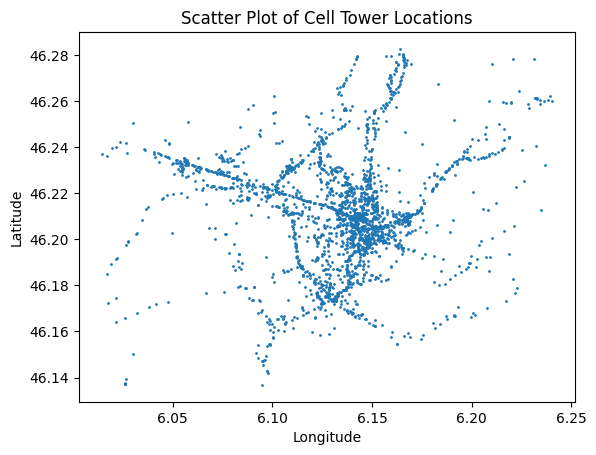

In [ ]:
# prompt: plot lat lon o a scatter plot
import matplotlib.pyplot as plt

# Create a scatter plot of latitude and longitude
plt.scatter(df_geneva['lon'], df_geneva['lat'], s=1)

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Cell Tower Locations')

# Display the plot
plt.show()


In [ ]:
## Visualise with folium
import folium

# Create a map centered on Geneva
m = folium.Map(location=[46.2044, 6.1432], zoom_start=12)

# Add cell tower locations to the map
for idx, row in df_geneva.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=3,
        color='red',
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

# Save the map to an HTML file
m.save('geneva_cell_towers.html')

In [ ]:
df_geneva_2024.to_csv("cell_towers_2024.csv")

In [ ]:
df_geneva_2024

,radio,mcc,mnc,lac,cid,psc,lon,lat,range,samples,changeable,created,updated,averagesignal
127,LTE,228,1,4242,17030147,0,6.1348,46.2587,3036,48,1,2014-05-17 18:21:31,2024-05-05 19:56:55,0
145,LTE,228,1,1111,17033218,0,6.1171,46.1992,1000,3,1,2014-07-11 15:24:46,2024-06-16 12:21:03,0
174,UMTS,228,1,2727,7852354,16,6.1184,46.2133,1000,14,1,2014-08-22 22:12:24,2024-02-05 13:59:06,0
707,UMTS,228,1,1111,7303110,50,6.0516,46.2343,5535,78,1,2015-07-01 11:06:05,2024-08-03 10:45:15,0
708,UMTS,228,1,1111,7328596,204,6.0235,46.2420,3091,113,1,2015-07-01 11:06:05,2024-08-03 10:45:15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39168,LTE,228,1,2727,17166857,-1,6.1119,46.2182,1000,2,1,2023-07-08 18:44:31,2024-08-03 10:45:11,0
39170,LTE,228,1,4242,19536386,-1,6.0299,46.2505,1000,2,1,2023-07-09 06:46:49,2024-08-03 10:45:14,0
39171,LTE,228,1,1111,18376965,-1,6.0544,46.2308,1000,3,1,2023-07-09 07:03:32,2024-08-03 10:45:15,0
39246,UMTS,228,1,1111,17474308,0,6.0843,46.1869,2672,3,1,2024-08-05 06:37:56,2024-08-05 12:12:03,0
